In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

# For CocaCola prices DATASET

# DATA DRIVEN MODEL

In [3]:
# Import Dataset
dataset=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
dataset.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
dataset.shape

(42, 2)

<AxesSubplot:>

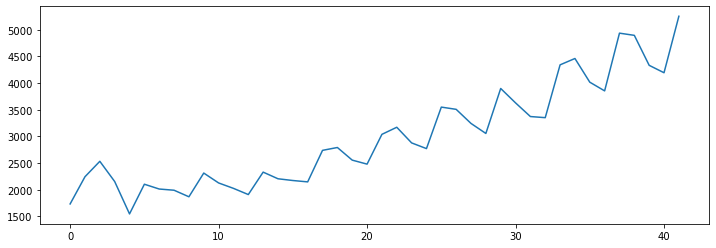

In [6]:
plt.figure(figsize=(12,4))
dataset.Sales.plot()

In [8]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Sales'>

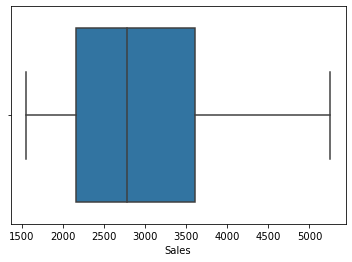

In [10]:
sns.boxplot(dataset["Sales"])

Splitting data

In [11]:
Train = dataset.head(37)
Test = dataset.tail(5)

Moving Average

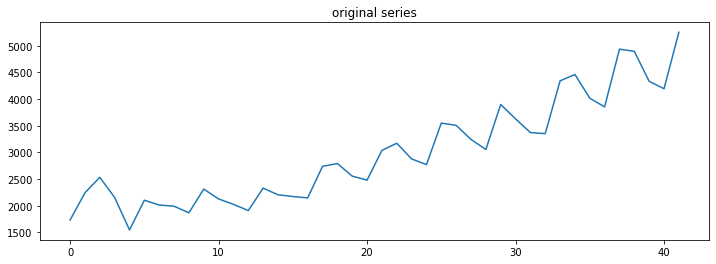

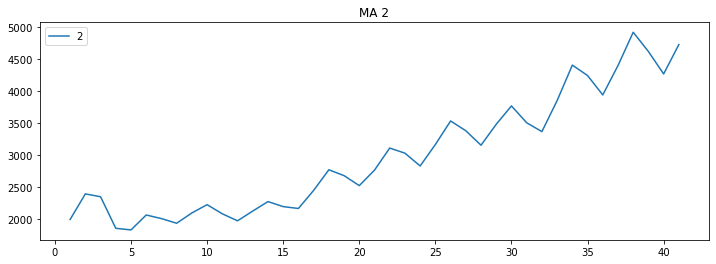

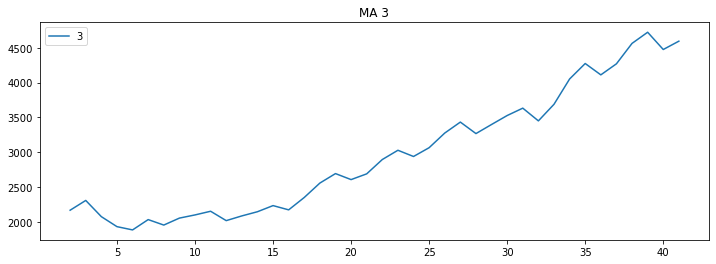

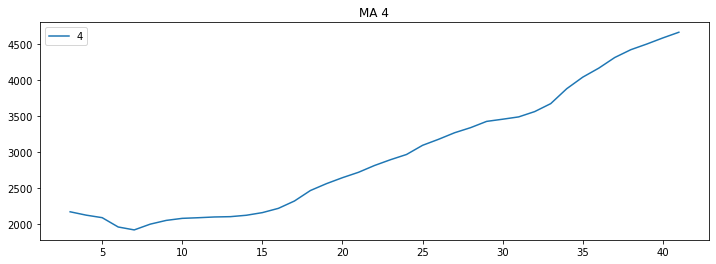

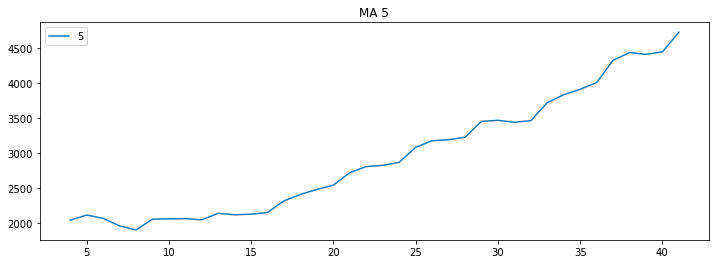

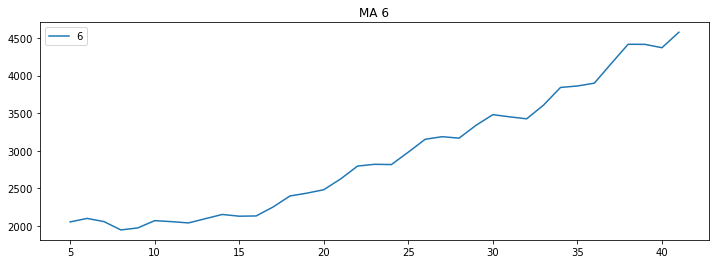

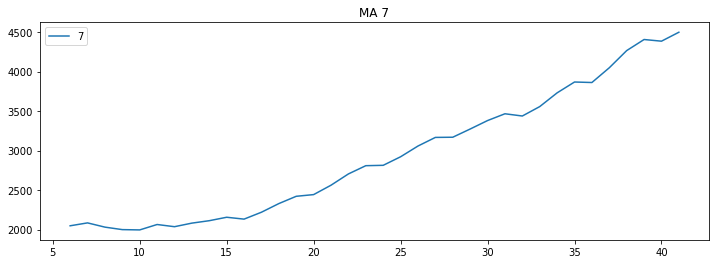

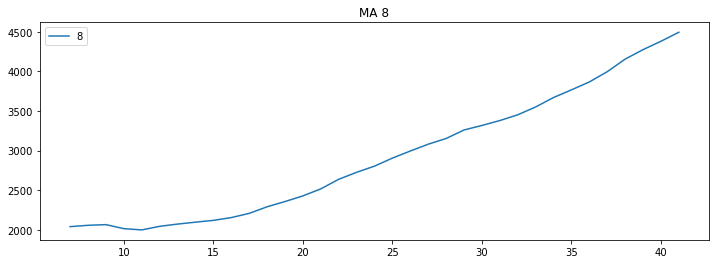

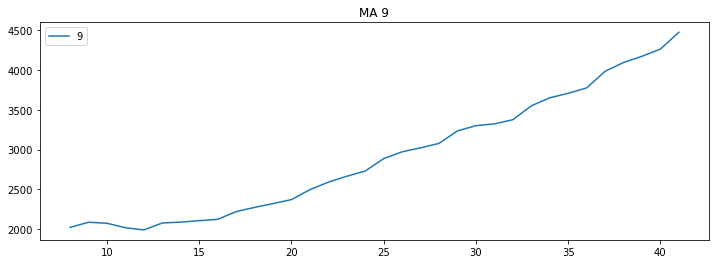

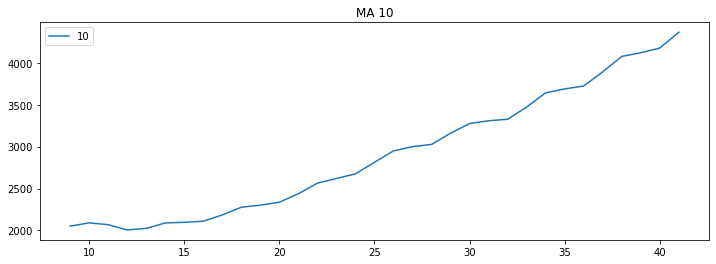

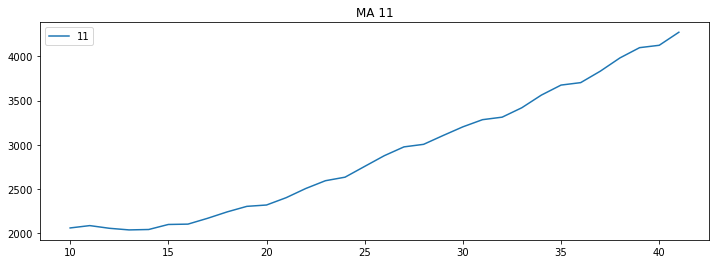

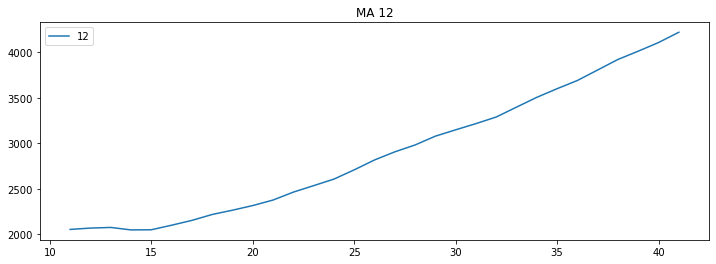

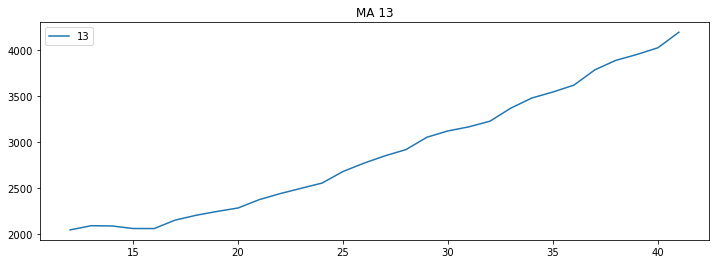

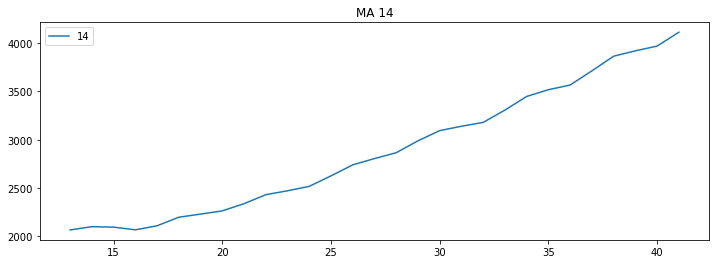

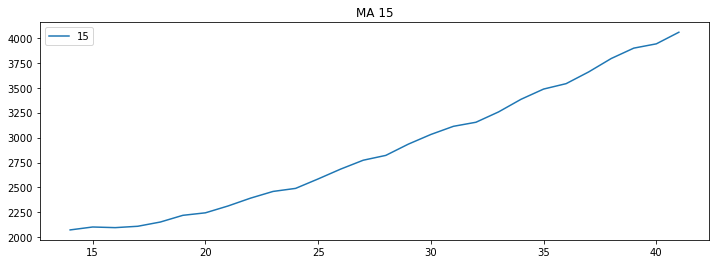

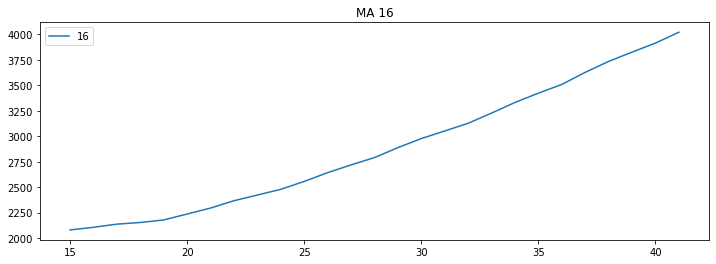

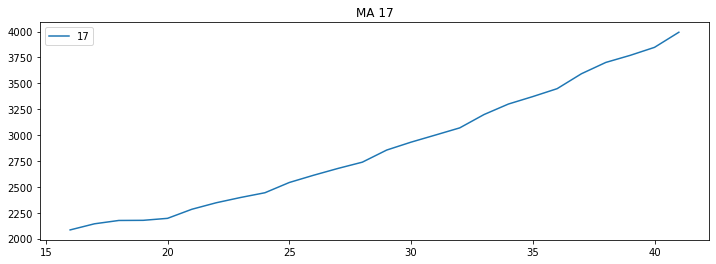

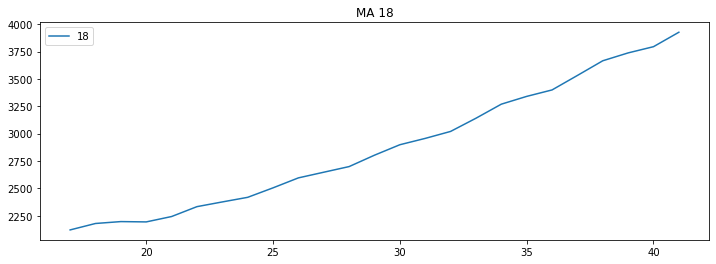

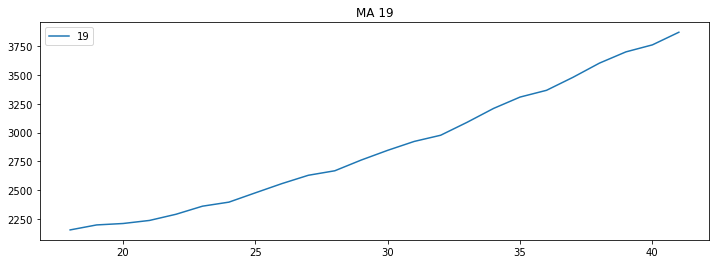

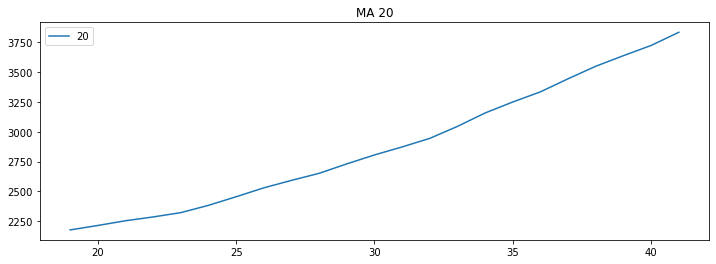

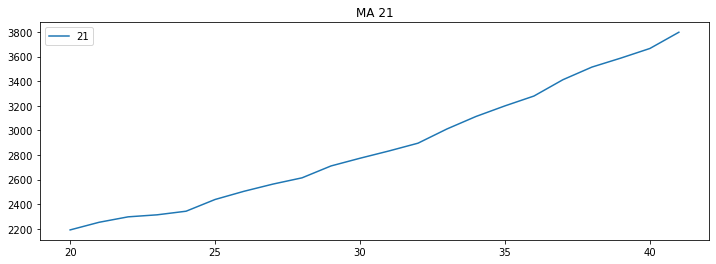

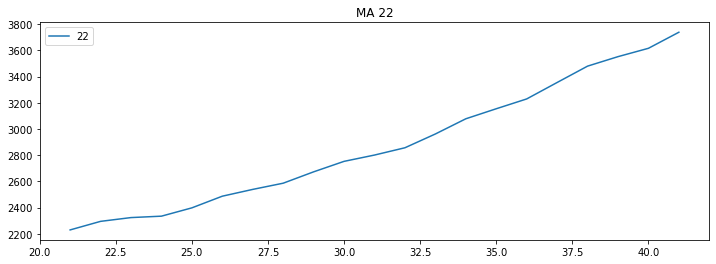

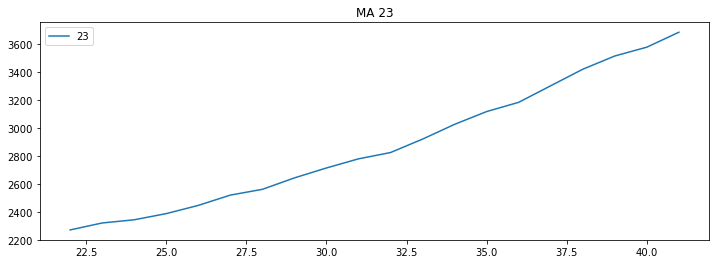

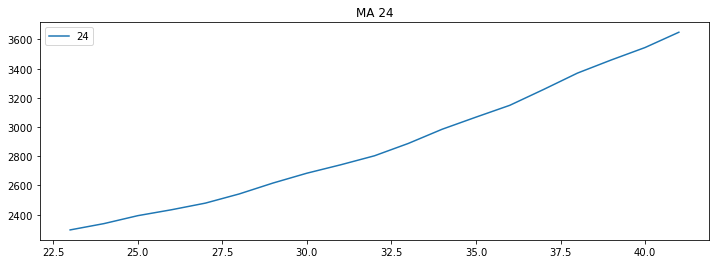

In [12]:
plt.figure(figsize=(12,4))
dataset.Sales.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))

    dataset["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

Time series decomposition plot

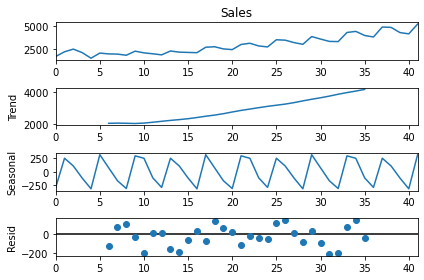

In [13]:
decompose_ts_add = seasonal_decompose(dataset.Sales,freq=12)
decompose_ts_add.plot()
plt.show()

ACF plots and PACF plots

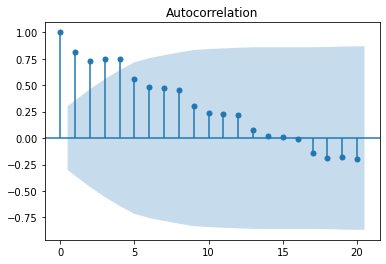

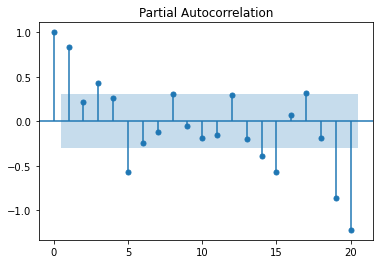

In [16]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(dataset.Sales,lags=20)
tsa_plots.plot_pacf(dataset.Sales,lags=20)
plt.show()

Evaluation Metric MAPE

In [17]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [18]:
y=1000
y_pred=999

y=3
y_pred=2

In [19]:
Test.index[0]

37

In [20]:
Test.index[-1]

41

Simple Exponential Method

In [21]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

19.127275540604103

In [22]:
pred_ses

37    3791.595457
38    3791.595457
39    3791.595457
40    3791.595457
41    3791.595457
dtype: float64

In [23]:
import numpy as np
x=np.arange(0.1,1,0.9/10)
for i in x :
    ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(pred_ses,Test.Sales) 
    print("smoothing_level ",i,"-->","MAPE Error",score)


smoothing_level  0.1 --> MAPE Error 26.896336322637712
smoothing_level  0.19 --> MAPE Error 19.579618470780822
smoothing_level  0.28 --> MAPE Error 16.745958470776817
smoothing_level  0.37 --> MAPE Error 15.577218523886808
smoothing_level  0.45999999999999996 --> MAPE Error 15.230021009374187
smoothing_level  0.5499999999999999 --> MAPE Error 15.362214882395069
smoothing_level  0.64 --> MAPE Error 15.775763546880267
smoothing_level  0.73 --> MAPE Error 16.326412382024404
smoothing_level  0.82 --> MAPE Error 16.90025872208131
smoothing_level  0.9099999999999999 --> MAPE Error 17.409837064305123


Holt method

In [24]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

14.28606271506533

In [25]:
pred_hw

37    3958.433595
38    3988.364962
39    4018.296329
40    4048.227696
41    4078.159063
dtype: float64

In [26]:
import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)

for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
        score=MAPE(pred_hw,Test.Sales)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 11.031651245427119
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 9.634363852915694
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 9.369465937597408
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 9.280509914864492
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 9.31515871836063
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 9.403375464579977
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 9.495734619962839
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 9.56999974257667
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 9.620118291935436
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 9.647513060094287
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 9.642446431170649
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 9.465620451538848
smoothing_level  0.19  smoothing_slope 0.28 --

Holts winter exponential smoothing with additive seasonality and additive trend

In [27]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 


4.918714876692283

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [28]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.011644590882857

Final Model by combining train and test

In [29]:
hwe_model_add_add = ExponentialSmoothing(dataset["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [30]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    4952.599860
43    4771.758098
44    4801.779667
45    5676.634556
46    5713.163216
47    5290.665128
48    5166.840196
49    6122.570866
50    6007.644296
51    5541.894870
dtype: float64

# ARIMA MODEL

In [31]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [36]:
# Import Dataset
dataset=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
dataset

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

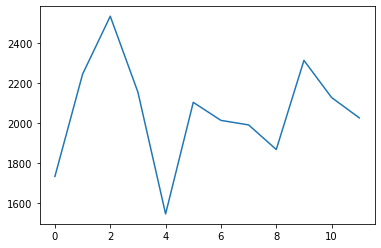

In [63]:
dataset.Sales.plot()

In [64]:
dataset.head()

,Quarter,Sales
0,1,1734.827000
1,2,2244.960999
2,3,2533.804993
3,4,2154.962997
4,1,1547.818996


In [65]:
Train = dataset.head(37)
Train

,Quarter,Sales
0,1,1734.827000
1,2,2244.960999
2,3,2533.804993
3,4,2154.962997
4,1,1547.818996
5,2,2104.411995
6,3,2014.362999
7,4,1991.746998
8,1,1869.049999
9,2,2313.631996


In [66]:
Test = dataset.tail(8)
Test

,Quarter,Sales
4,1,1547.818996
5,2,2104.411995
6,3,2014.362999
7,4,1991.746998
8,1,1869.049999
9,2,2313.631996
10,3,2128.320000
11,4,2026.828999


In [75]:
##################### Exponential ##############################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Quarter	~Sales',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Sales'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

2007.9633156335965

In [76]:
##################### Exponential ##############################

Exp = smf.ols('Quarter~Sales',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['Sales'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Quarter'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

10.232004759895496

In [51]:
dataset.Quarter.replace(('Q1_86','Q2_86','Q3_86','Q4_86'),(1,2,3,4), inplace=True)
dataset.Quarter.replace(('Q1_87','Q2_87','Q3_87','Q4_87'),(1,2,3,4), inplace=True)
dataset.Quarter.replace(('Q1_88','Q2_88','Q3_88','Q4_88'),(1,2,3,4), inplace=True)
dataset.Quarter.replace(('Q1_89','Q2_89','Q3_89','Q4_89'),(1,2,3,4), inplace=True)
dataset.Quarter.replace(('Q1_90','Q2_90','Q3_90','Q4_90'),(1,2,3,4), inplace=True)
dataset.Quarter.replace(('Q1_91','Q2_91','Q3_91','Q4_91'),(1,2,3,4), inplace=True)
dataset.Quarter.replace(('Q1_92','Q2_92','Q3_92','Q4_92'),(1,2,3,4), inplace=True)
dataset.Quarter.replace(('Q1_93','Q2_93','Q3_93','Q4_93'),(1,2,3,4), inplace=True)
dataset.Quarter.replace(('Q1_94','Q2_94','Q3_94','Q4_94'),(1,2,3,4), inplace=True)
dataset.Quarter.replace(('Q1_95','Q2_95','Q3_95','Q4_95'),(1,2,3,4), inplace=True)
dataset.Quarter.replace(('Q1_96','Q2_96'),(1,2), inplace=True)

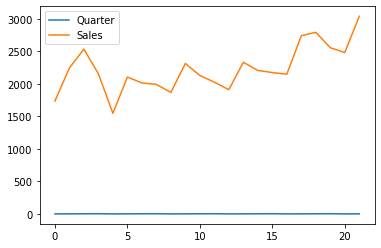

In [52]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
dataset.plot()
pyplot.show()

In [53]:
# separate out a validation dataset
split_point = len(dataset) - 10
dataset, validation = dataset[0:split_point], dataset[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 12, Validation 10


Persistence/ Base model

In [83]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values

X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]

ARIMA Hyperparameters

In [84]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


In [90]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

Grid search for p,d,q values

In [92]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e :
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [93]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
Insufficient degrees of freedom to estimate
d > 2 is not supported
d > 2 is not supported
d > 2 is not supported
d > 2 is not supported
d > 2 is not supported
d > 2 is not supported
d > 2 is not supported
d > 2 is not supported
d > 2 is not supported
d > 2 is not supported
Insufficient degrees of freedom to estimate
Insu

Build Model based on the optimized values

In [94]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [95]:
# load data
train = read_csv('dataset.csv', index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [96]:
train

,1,1734.8269996643066
0,,
1,2,2244.960999
2,3,2533.804993
3,4,2154.962997
4,1,1547.818996
5,2,2104.411995
6,3,2014.362999
7,4,1991.746998
8,1,1869.049999
9,2,2313.631996


# For AIRLINES DATASET

In [133]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [134]:
# Import Dataset
airline=pd.read_excel("Airlines+Data.xlsx")
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


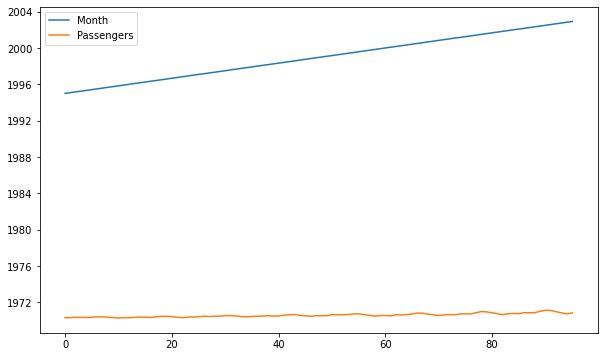

In [130]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
airline.plot()
pyplot.show()

In [131]:
# separate out a validation dataset
split_point = len(airline) - 10
dataset, validation = airline[0:split_point], airline[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


In [140]:
airline.shape

(96, 2)

<AxesSubplot:>

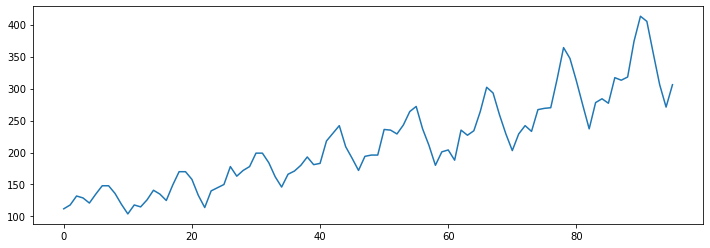

In [142]:
plt.figure(figsize=(12,4))

airline.Passengers.plot()

In [143]:
# Splitting data

Train = airline.head(86)
Test = airline.tail(10)

Moving Average

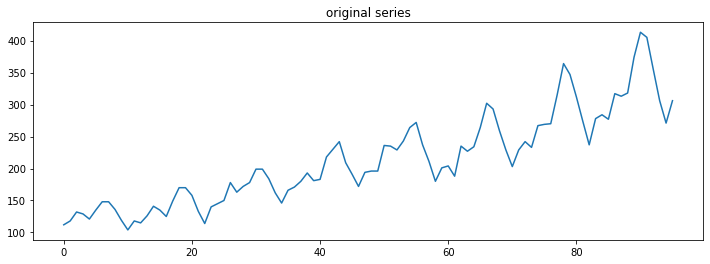

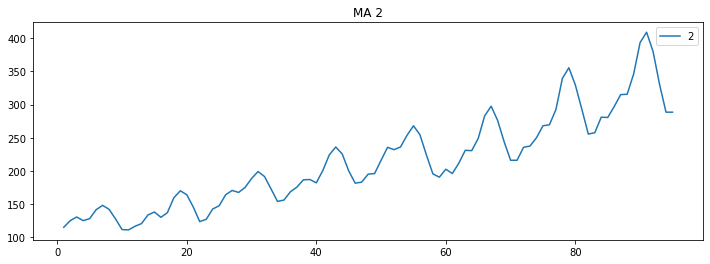

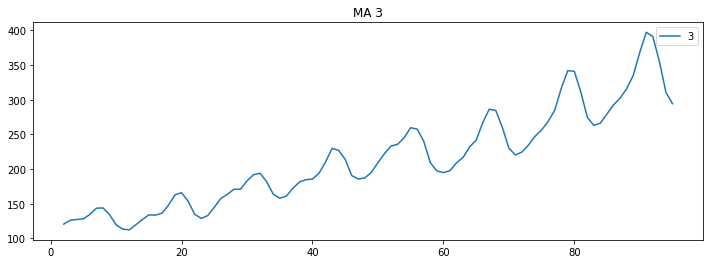

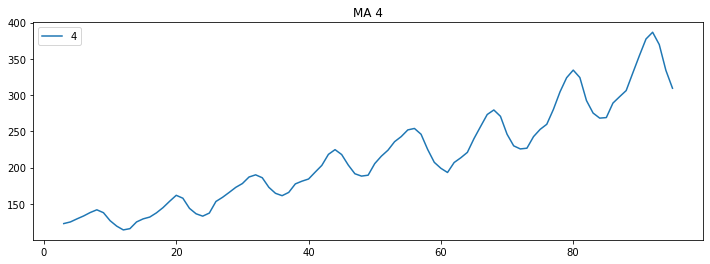

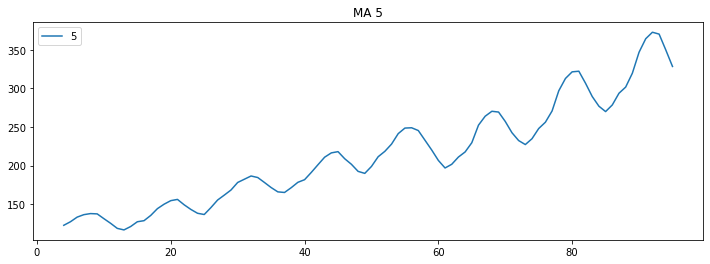

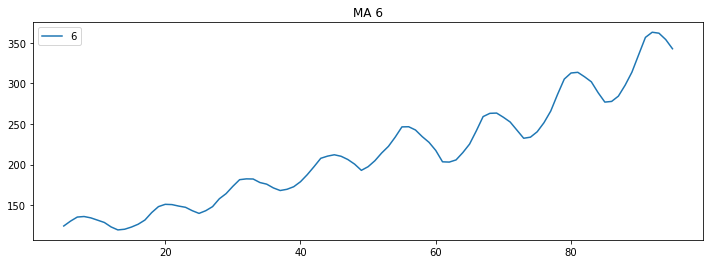

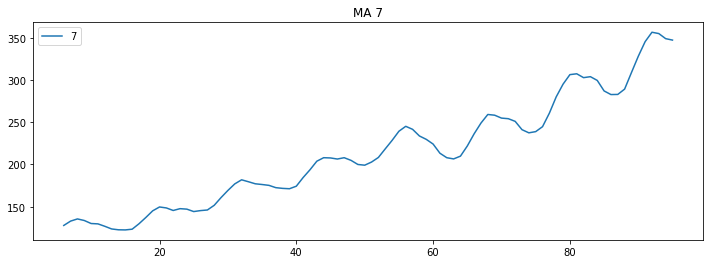

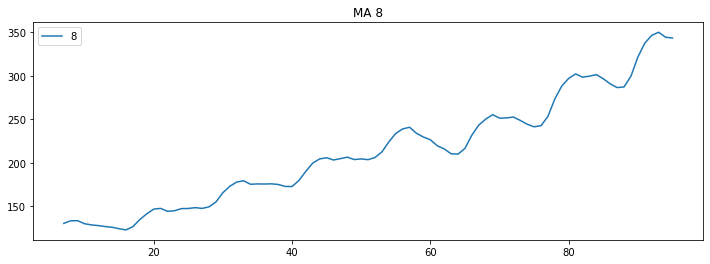

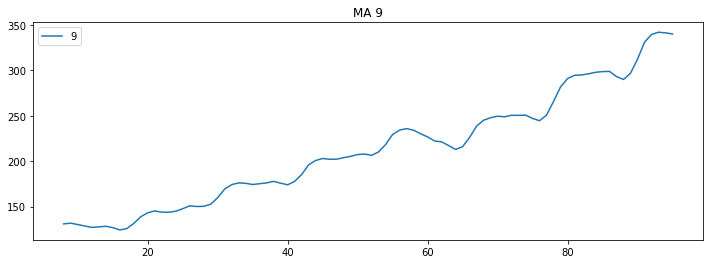

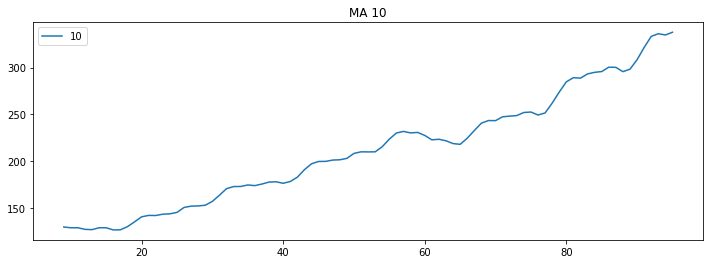

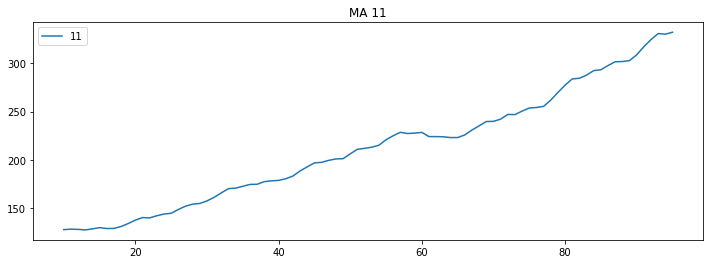

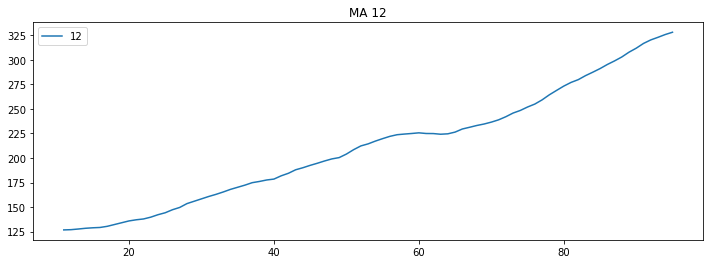

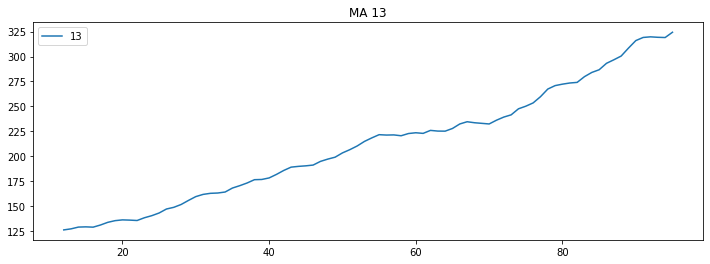

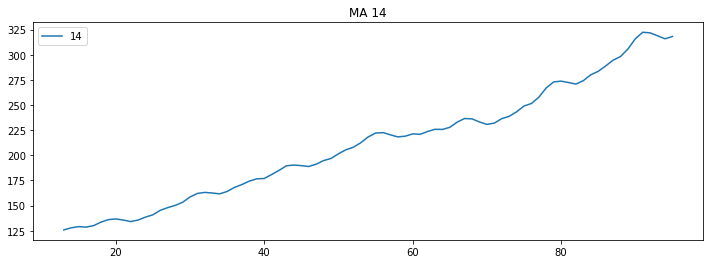

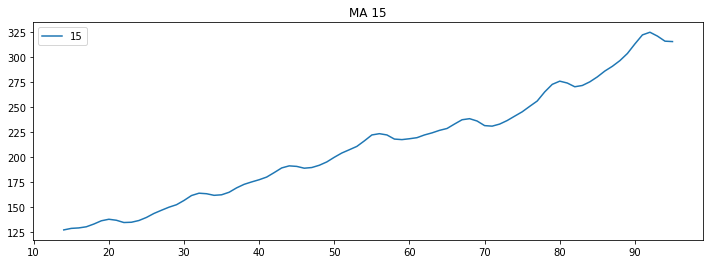

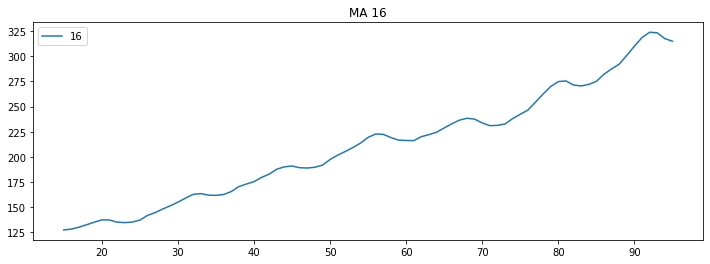

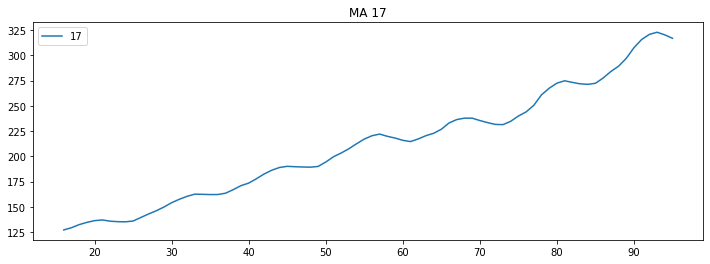

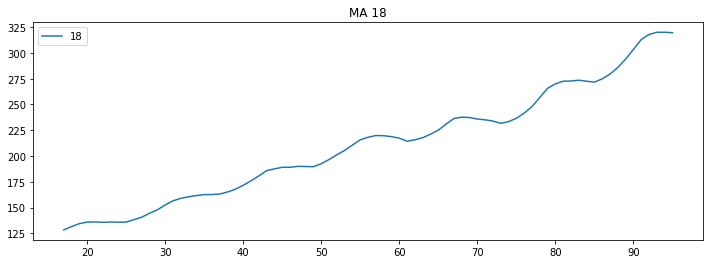

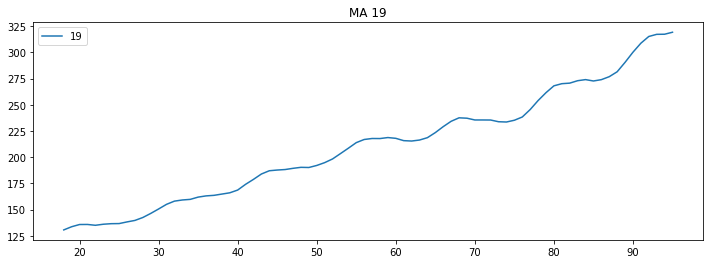

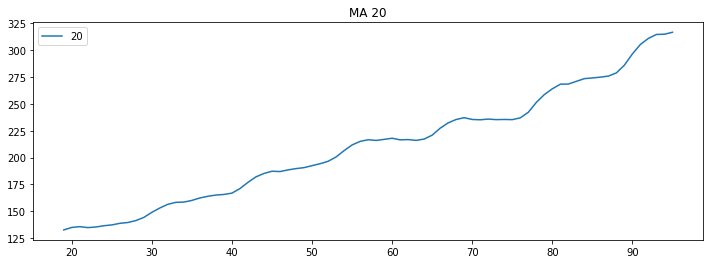

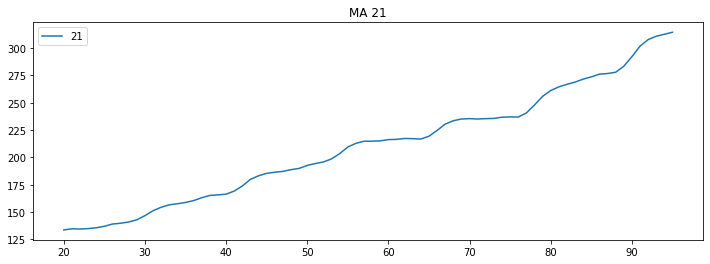

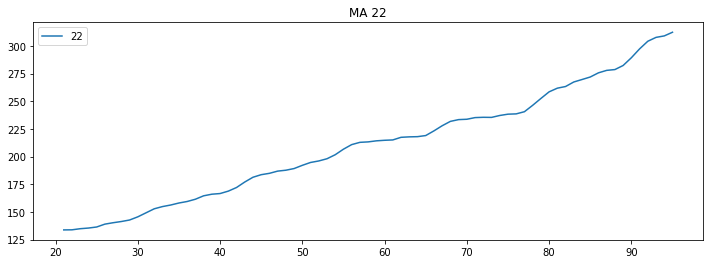

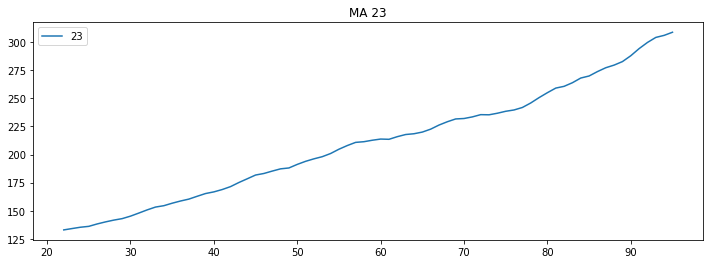

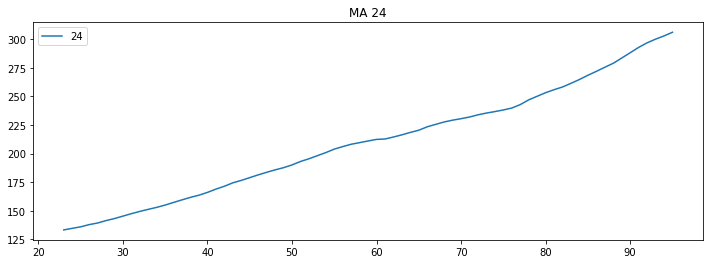

In [144]:
plt.figure(figsize=(12,4))
airline.Passengers.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    airline["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

Time series decomposition plot

In [ ]:
import warinings
warnings.filterwarnings('ignore')

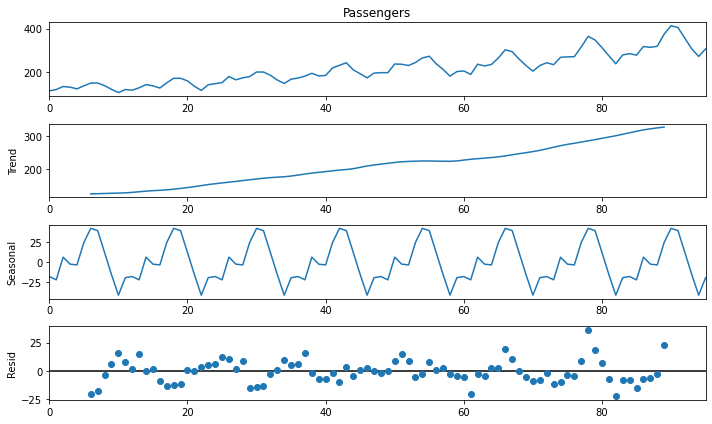

In [145]:
decompose_ts_add = seasonal_decompose(airline.Passengers,freq=12)
decompose_ts_add.plot()
plt.show()

ACF plots and PACF plots

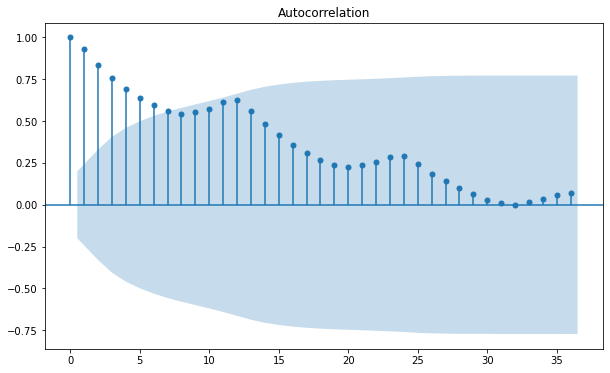

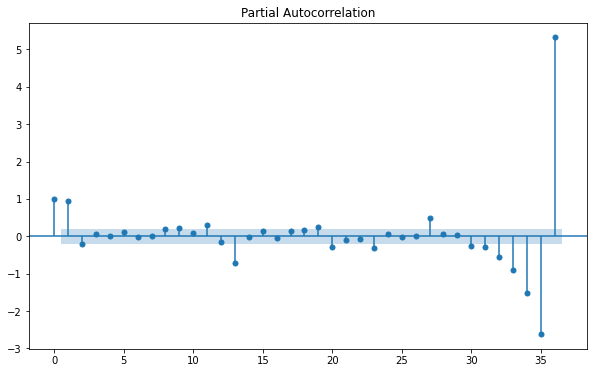

In [146]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline.Passengers,lags=36)
tsa_plots.plot_pacf(airline.Passengers,lags=36)
plt.show()

Evaluation Metric MAPE

In [147]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [148]:
y=1000
y_pred=999

y=3
y_pred=2

In [149]:
Test.index[0]

86

In [150]:
Test.index[-1]

95

Simple Exponential Method

In [151]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

16.027027959159916

In [152]:
pred_ses

86    281.556696
87    281.556696
88    281.556696
89    281.556696
90    281.556696
91    281.556696
92    281.556696
93    281.556696
94    281.556696
95    281.556696
dtype: float64

In [153]:
import numpy as np
x=np.arange(0.1,1,0.9/10)
for i in x :
    ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(pred_ses,Test.Passengers) 
    print("smoothing_level ",i,"-->","MAPE Error",score)

smoothing_level  0.1 --> MAPE Error 17.94698995017482
smoothing_level  0.19 --> MAPE Error 16.062257143445997
smoothing_level  0.28 --> MAPE Error 16.166651493319605
smoothing_level  0.37 --> MAPE Error 16.569854432955648
smoothing_level  0.45999999999999996 --> MAPE Error 16.833744188279105
smoothing_level  0.5499999999999999 --> MAPE Error 16.91419921306453
smoothing_level  0.64 --> MAPE Error 16.891583543954198
smoothing_level  0.73 --> MAPE Error 16.855518478276885
smoothing_level  0.82 --> MAPE Error 16.86383848515747
smoothing_level  0.9099999999999999 --> MAPE Error 16.936445986468463


Holt method

In [154]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

18.35070366668471

In [155]:
pred_hw

86    276.413573
87    275.289037
88    274.164501
89    273.039965
90    271.915429
91    270.790893
92    269.666357
93    268.541821
94    267.417285
95    266.292749
dtype: float64

In [156]:
import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)

for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
        score=MAPE(pred_hw,Test.Passengers)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 11.85945162690157
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 11.369394002895515
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 10.755937437865912
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 10.36870862110771
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 9.733101401141607
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 10.025853601402332
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 12.633065381944087
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 15.916751570635807
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 18.794634451083542
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 20.936263980428155
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 11.835431227089146
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 11.295210172806286
smoothing_level  0.19  smoothing_slo

smoothing_level  0.9099999999999999  smoothing_slope 0.9099999999999999 --> MAPE Error 23.02470698970838


Holts winter exponential smoothing with additive seasonality and additive trend

In [157]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

7.68640055591369

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [158]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.3278168746447654

Final Model by combining train and test

In [159]:
hwe_model_add_add = ExponentialSmoothing(airline["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [160]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     319.235281
97     311.528396
98     350.278697
99     346.984962
100    351.845000
101    403.925721
102    440.566848
103    427.446585
104    376.628288
105    329.767602
dtype: float64